# 클러스터링

- 특성 공간상에서 거리가 가까운 (유사한) 샘플들을 묶는 것(군집화)
- 거리기반  클러스터링(kMeans), 밀도기반 클러스터링(DBSCAN)

## 데이터
- 전력판매량(시도별/용도별) 액셀 파일

## 코랩에서 한글 폰트 설치
- 코랩을 사용하는 경우만 필요함 (리눅스에 한글 폰트 설치 방법)

In [1]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'retina'
 
# !apt -qq -y install fonts-nanum
 
# import matplotlib.font_manager as fm
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=10)
# plt.rc('font', family='NanumBarunGothic') 
# mpl.font_manager._rebuild()

-  (주의!) 여기서 런타임 - 런타임 다시 시작을 실행한 후에 위의 코드 셀을 다시한번 실행하여야 한다

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
from sklearn.metrics import silhouette_samples, silhouette_score

## 한글 설치

In [4]:
import platform, matplotlib
from matplotlib import rc

# '-' 기호 제대로 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

# 윈도우
if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

데이터 읽기
--

In [5]:
power_data = pd.read_excel('https://github.com/StillWork/data/blob/master/power.xls?raw=true')
print(power_data.shape)
power_data[:3]

(19, 28)


,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859


In [6]:
power_data

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
5,광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
6,대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
7,대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
8,부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358
9,서울,13131172,3581534,27647345,31228879,15150,4064,1918893,227077,497699,...,163688,4395,11425,46225,20182,17656,132707,2875,1938107,46298158


In [7]:
power_data.columns

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')

In [8]:
df = power_data.set_index('구분')
df = df.drop(['합계', '개성'])
df = df.drop('합계', axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주거용     17 non-null     int64
 1   공공용     17 non-null     int64
 2   서비스업    17 non-null     int64
 3   업무용합계   17 non-null     int64
 4   농림어업    17 non-null     int64
 5   광업      17 non-null     int64
 6   제조업     17 non-null     int64
 7   식료품제조   17 non-null     int64
 8   섬유,의류   17 non-null     int64
 9   목재,나무   17 non-null     int64
 10  펄프,종이   17 non-null     int64
 11  출판,인쇄   17 non-null     int64
 12  석유,화확   17 non-null     int64
 13  의료,광학   17 non-null     int64
 14  요업      17 non-null     int64
 15  1차금속    17 non-null     int64
 16  조립금속    17 non-null     int64
 17  기타기계    17 non-null     int64
 18  사무기기    17 non-null     int64
 19  전기기기    17 non-null     int64
 20  영상,음향   17 non-null     int64
 21  자동차     17 non-null     int64
 22  기타운송    17 non-null     int64
 23  가구및기타   17 non-null  

<function matplotlib.pyplot.show(close=None, block=None)>

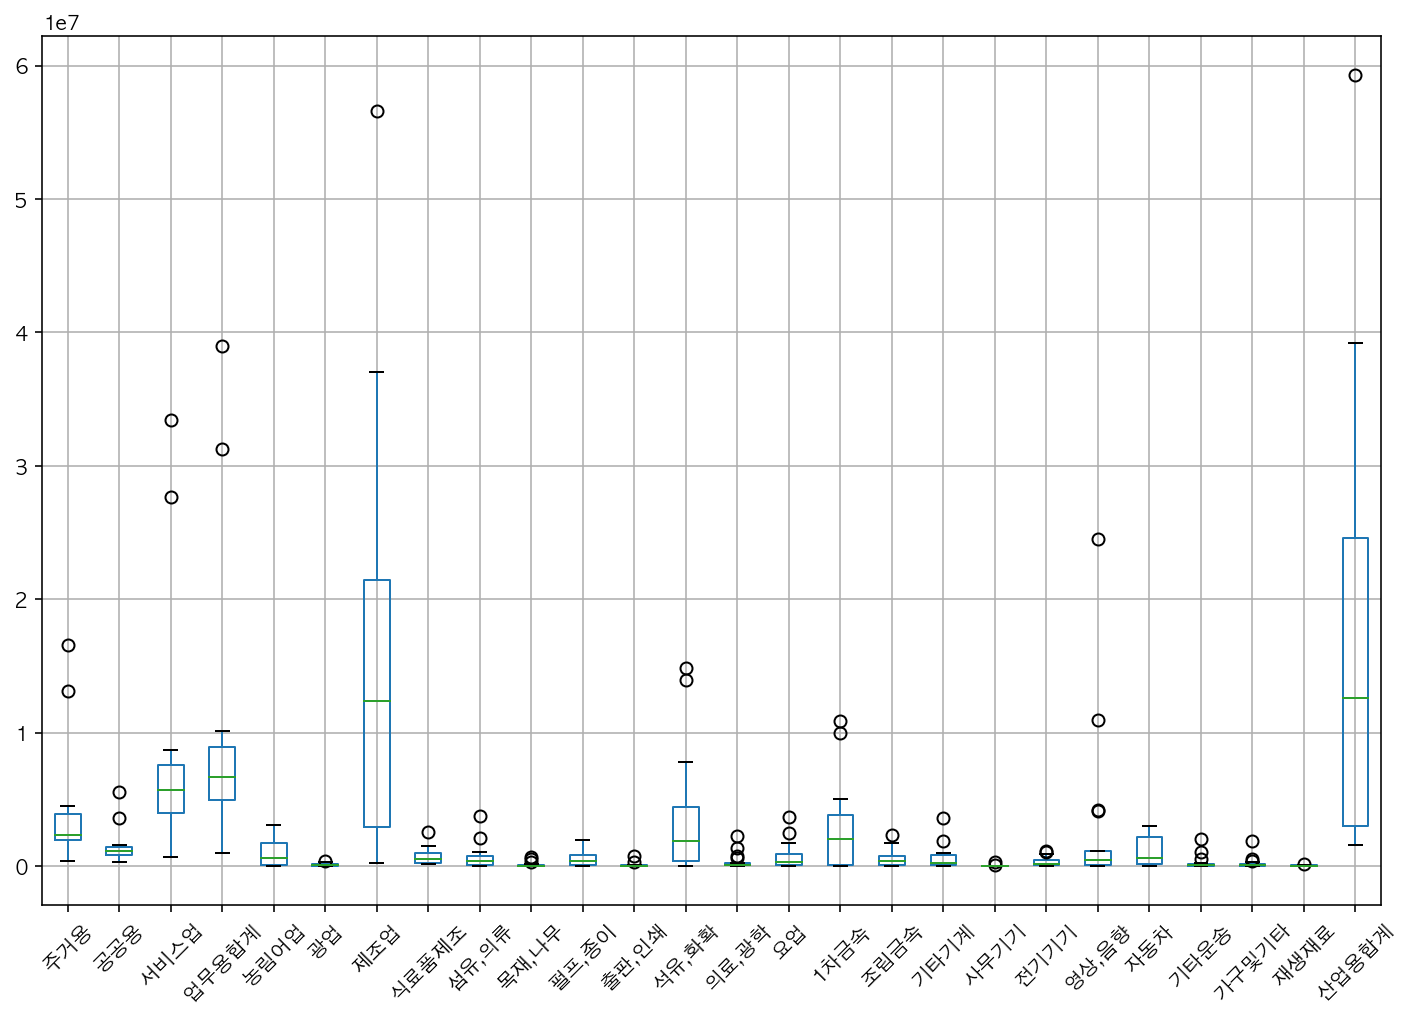

In [10]:
df.boxplot(figsize=(12,8))
plt.xticks(rotation=45)
plt.show

<AxesSubplot:ylabel='구분'>

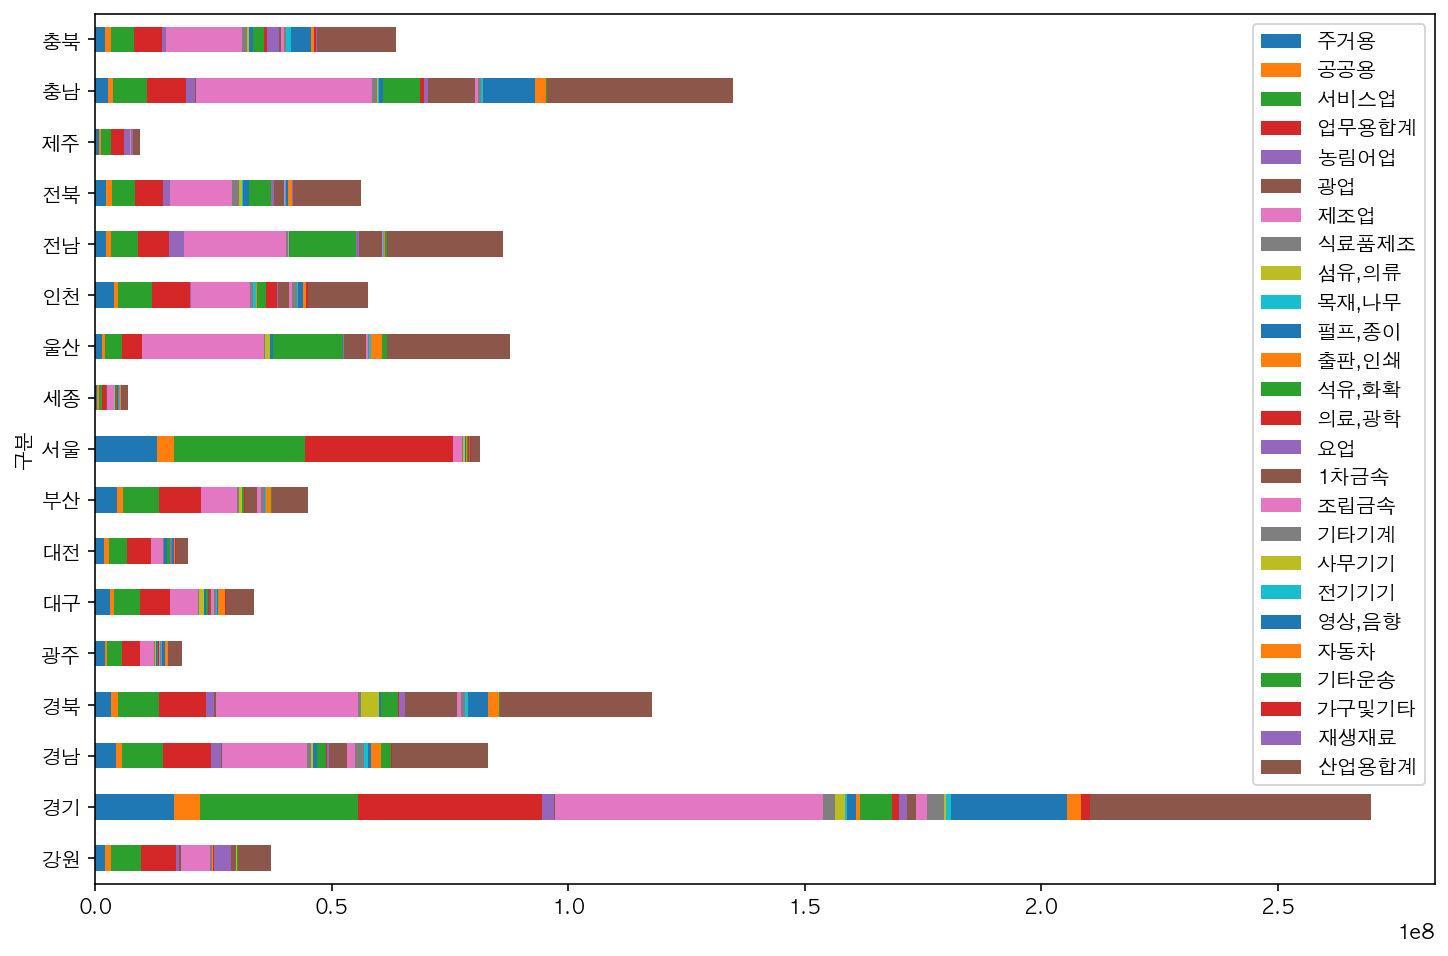

In [11]:
df.plot(kind='barh', figsize=(12,8), stacked=True)

<AxesSubplot:ylabel='구분'>

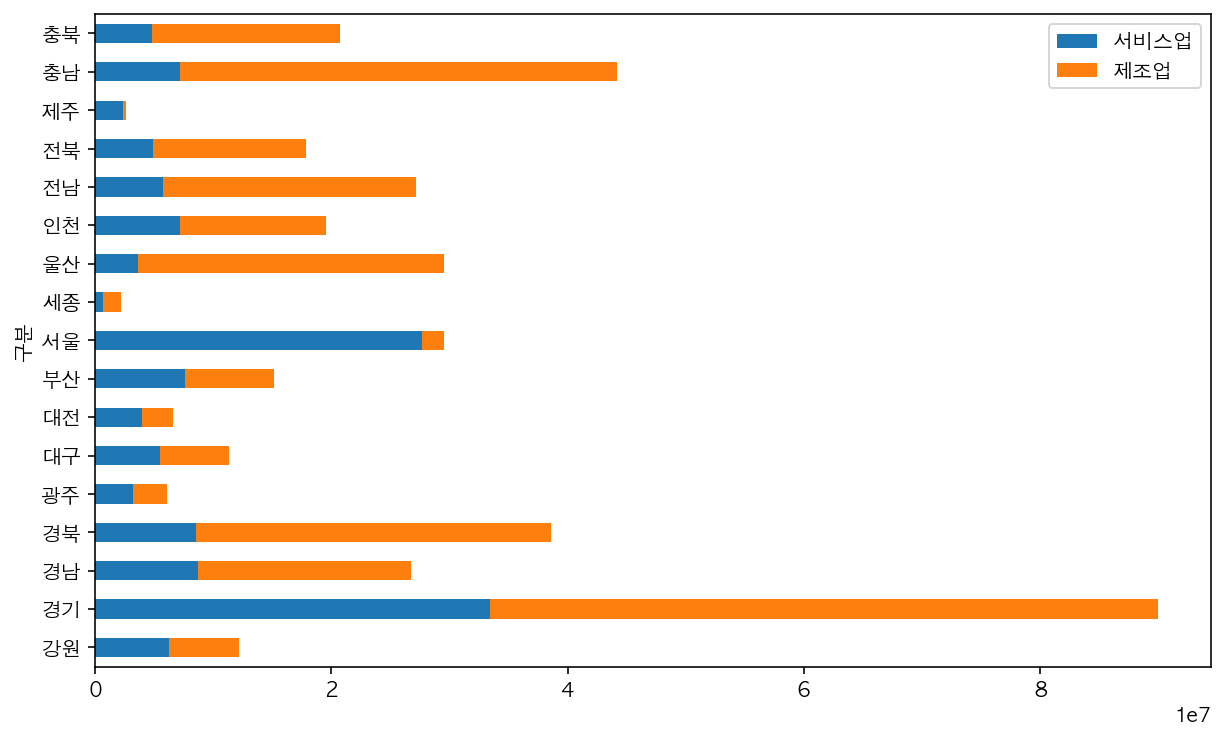

In [12]:
df = df[['서비스업', '제조업']]
df.plot(kind='barh', figsize=(10,6), stacked=True)

In [13]:
df.head(5)

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768


데이터 탐색

In [14]:
df.index

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='구분')

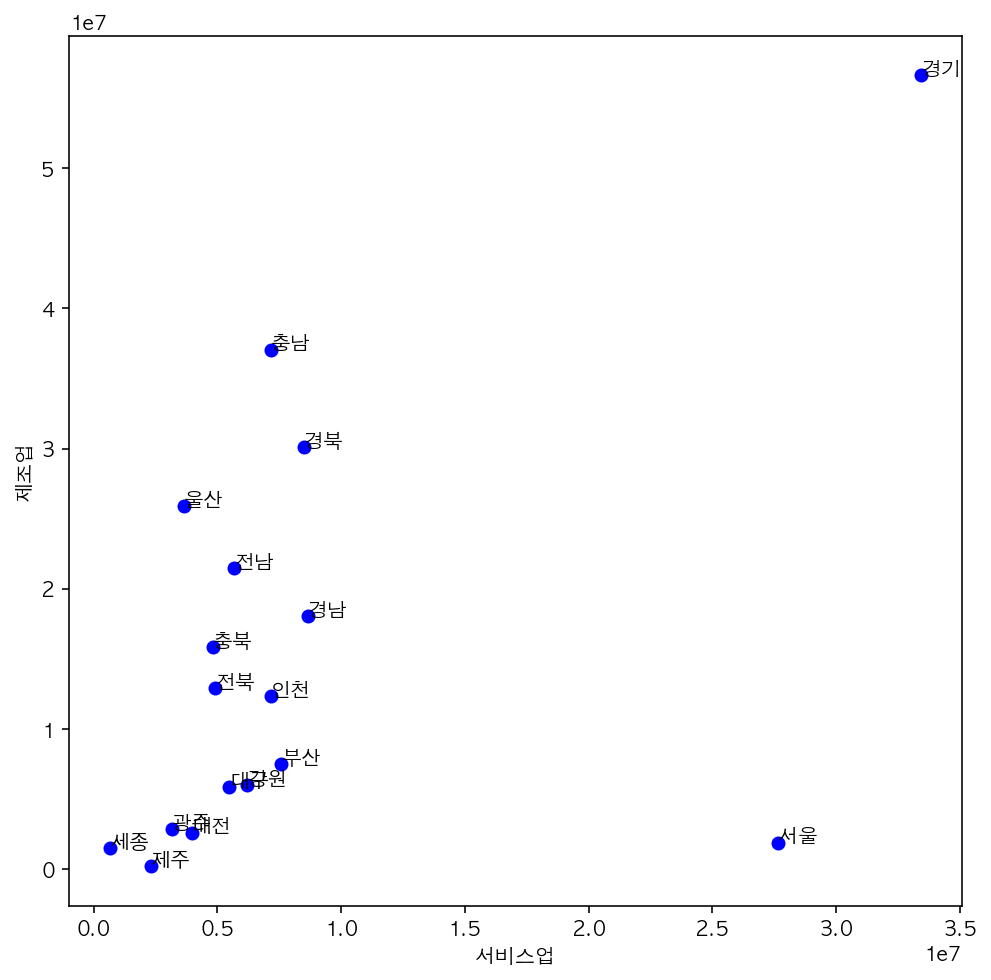

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(df['서비스업'], df['제조업'],c='b',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(df.shape[0]):
    plt.text(df['서비스업'][n], df['제조업'][n], df.index[n])

### 아웃라이어

In [16]:
df = df.drop(['경기', '서울'])

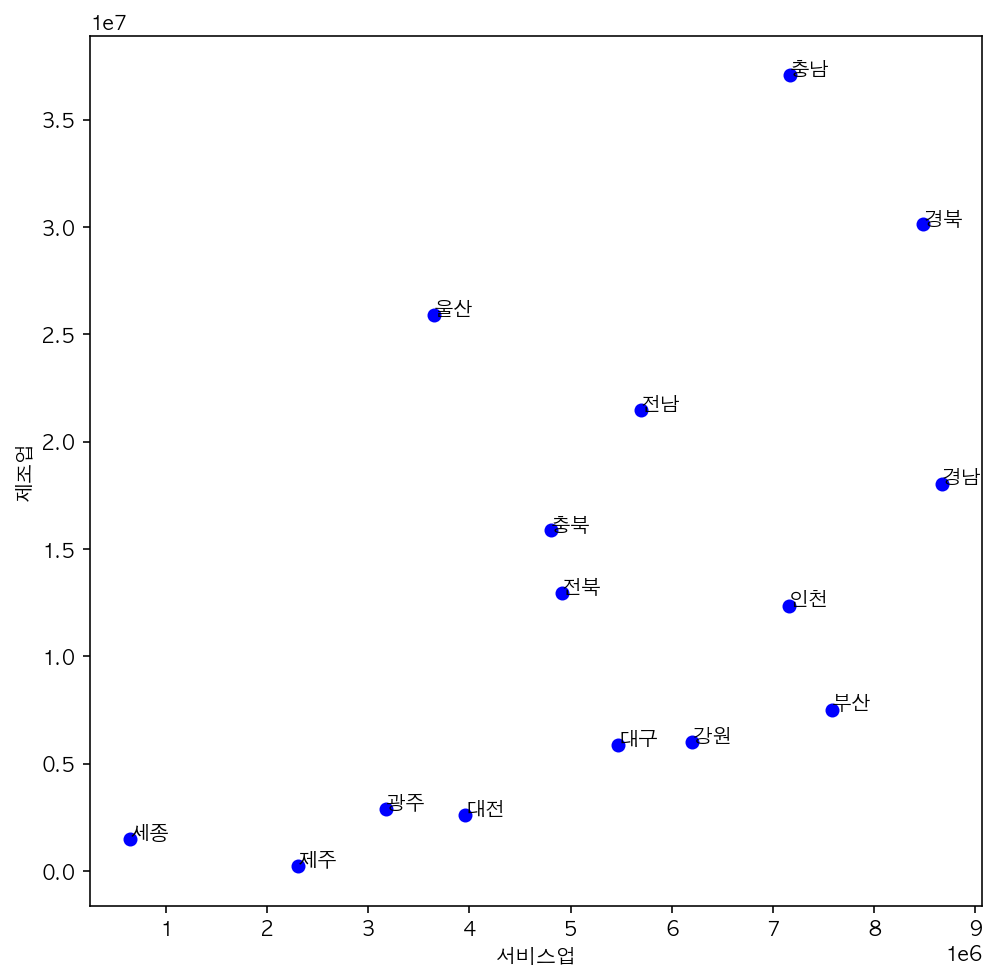

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(df['서비스업'], df['제조업'],c='b',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(df.shape[0]):
    plt.text(df['서비스업'][n], df['제조업'][n], df.index[n])

# 거리기반 클러스터링

## 두개의 특성만 사용

<function matplotlib.pyplot.show(close=None, block=None)>

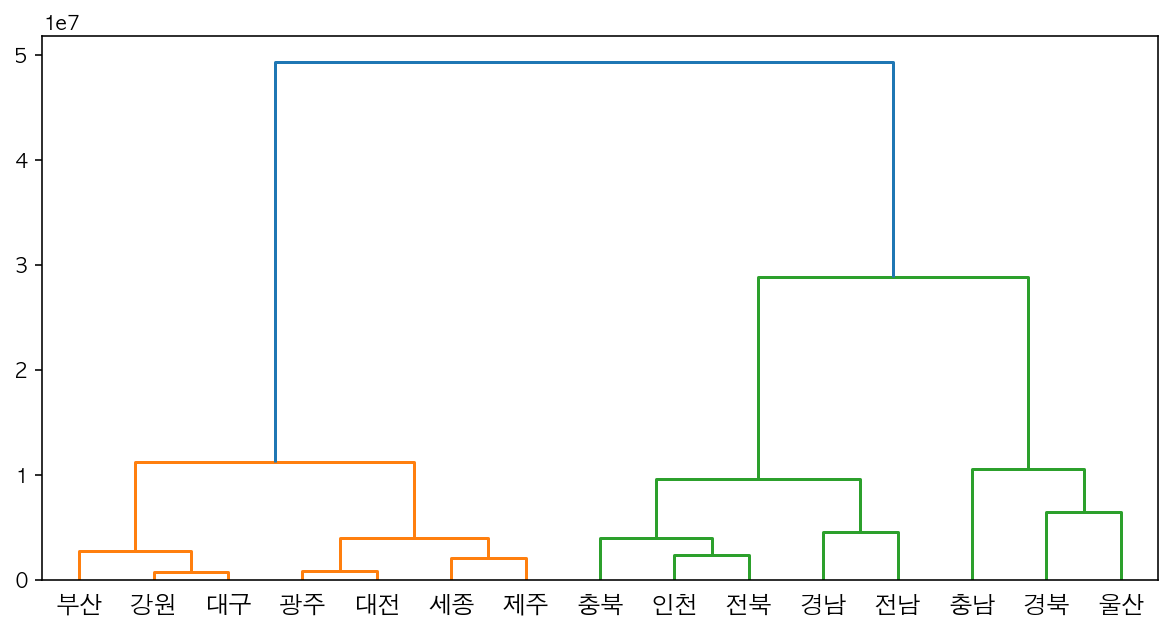

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
link_dist = linkage(df, metric='euclidean', method='ward')  
dendrogram(link_dist, labels=df.index.tolist())
plt.show()

In [19]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=6)
k.fit(df) # (2) 모델 학습
k.labels_

array([0, 2, 4, 3, 0, 3, 0, 3, 4, 5, 2, 5, 3, 1, 5], dtype=int32)

In [20]:
df['클러스터'] = k.labels_
df.head(10)

,서비스업,제조업,클러스터
구분,,,
강원,6203749,6002286,0
경남,8667737,18053778,2
경북,8487402,30115601,4
광주,3174973,2910768,3
대구,5470438,5862633,0
대전,3955921,2608343,3
부산,7582169,7512588,0
세종,645424,1502922,3
울산,3649386,25883132,4


In [21]:
df.drop('클러스터', axis = 1, inplace=True) ; df.head()

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633


In [22]:
centers = k.cluster_centers_ ; centers

array([[ 6418785.33333333,  6459169.        ],
       [ 7164439.        , 37057955.        ],
       [ 7179198.        , 19753852.        ],
       [ 2521262.5       ,  1815892.5       ],
       [ 6068394.        , 27999366.5       ],
       [ 5623124.        , 13739046.33333333]])

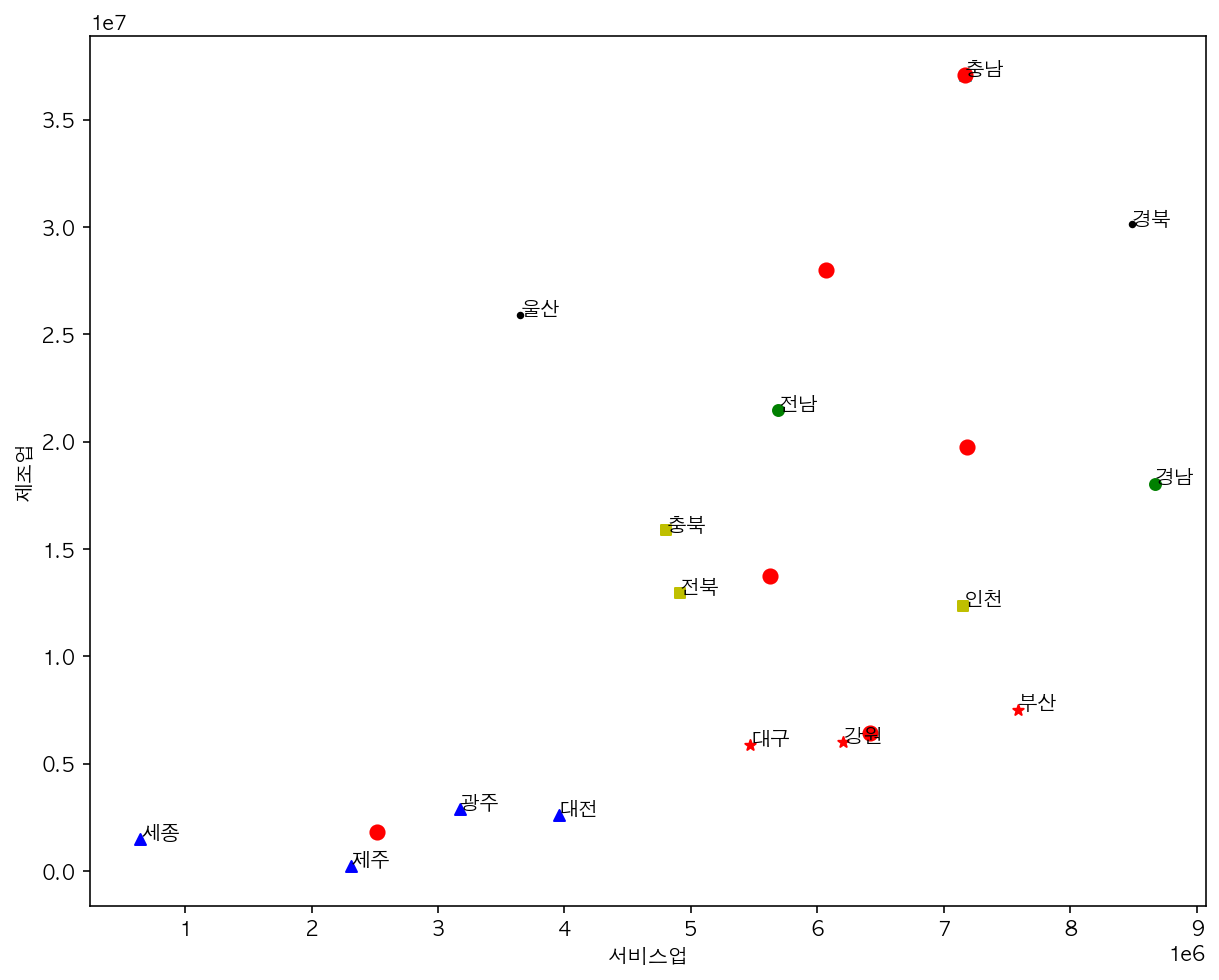

In [23]:
my_markers=['*','^', 'o','^','.',',','1','2']
my_color =['r','c','g','b','k','y','r','y']

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(df.shape[0]):
    label = k.labels_[n]
    plt.scatter(df['서비스업'][n], df['제조업'][n], c=my_color[label], marker=my_markers[label], s=30)
    plt.text(df['서비스업'][n], df['제조업'][n], df.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['서비스업', '제조업']] = scaler.fit_transform(df[['서비스업', '제조업']])
df[:10]

,서비스업,제조업
구분,,
강원,0.393992,-0.676282
경남,1.498349,0.431200
경북,1.417523,1.539632
광주,-0.963503,-0.960380
대구,0.065323,-0.689116
대전,-0.613482,-0.988171
부산,1.011798,-0.537491
세종,-2.097244,-1.089755
울산,-0.750871,1.150686


<function matplotlib.pyplot.show(close=None, block=None)>

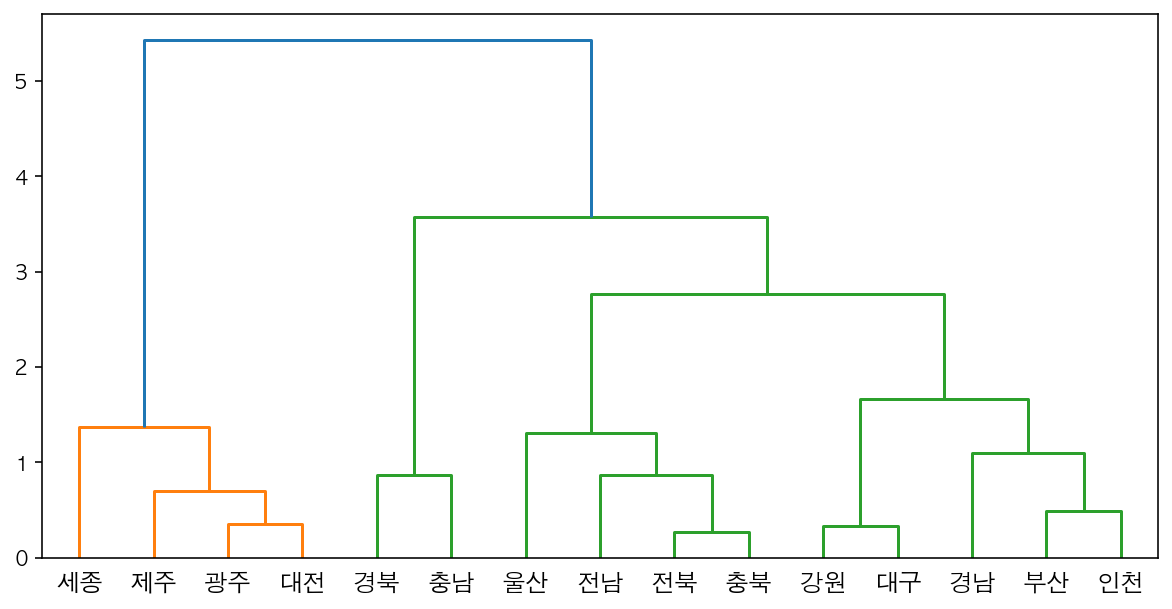

In [25]:
Z = linkage(df, metric='euclidean', method='ward') 
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df.index.tolist())
plt.show

In [26]:
k = KMeans(n_clusters= 6)
k.fit(df)

KMeans(n_clusters=6)

In [27]:
centers = k.cluster_centers_ 

<Figure size 432x288 with 0 Axes>

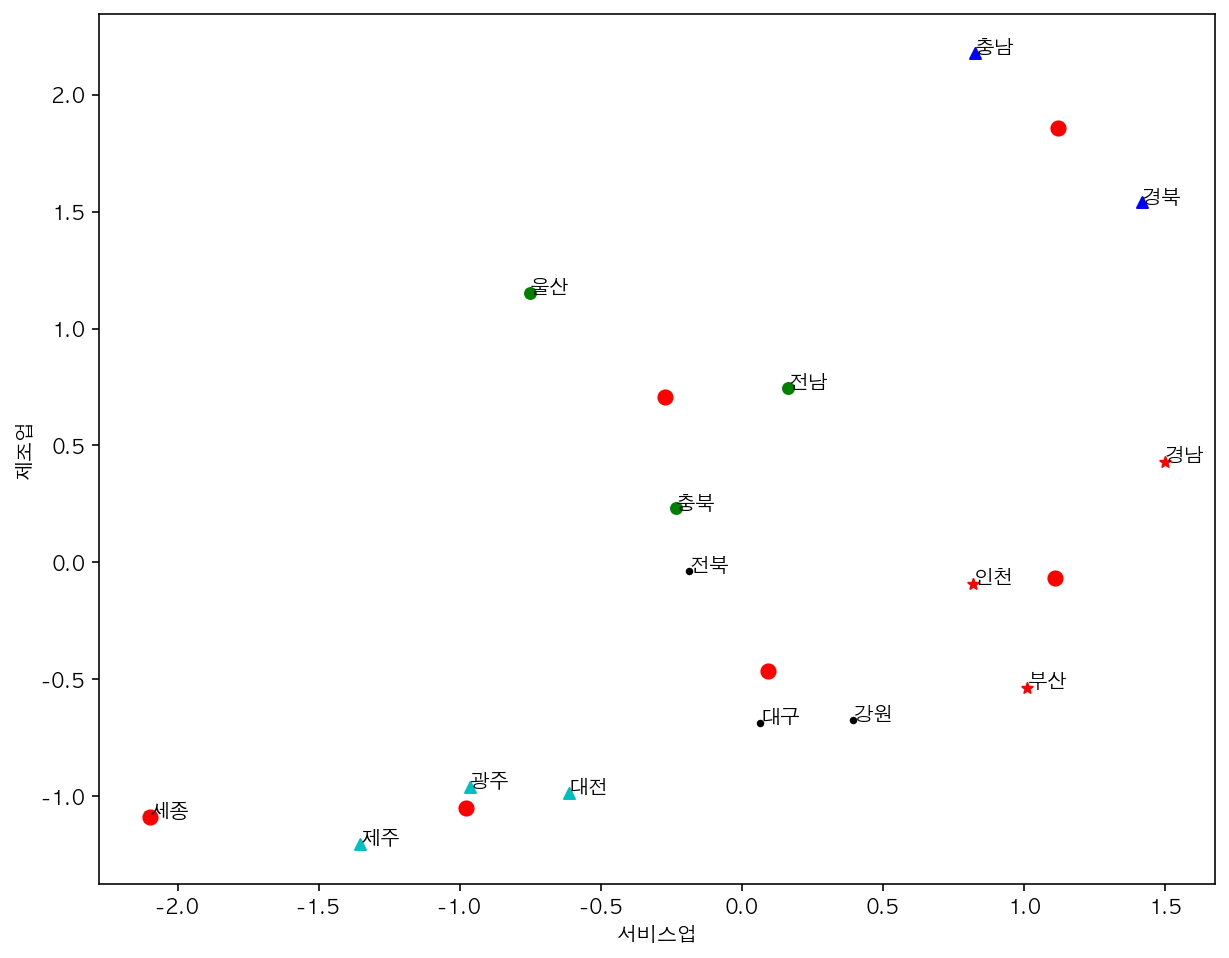

In [28]:
plt.clf()
plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(df.shape[0]):
    label = k.labels_[n]
    plt.scatter(df['서비스업'][n], df['제조업'][n], c=my_color[label], marker=my_markers[label], s=30)
    plt.text(df['서비스업'][n], df['제조업'][n], df.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

## 모든 특성 고려

In [29]:
df = power_data.set_index('구분')
df.drop(['업무용합계', '산업용합계', '합계'], axis=1, 
           inplace=True, errors='ignore')
df.drop(['합계','개성','경기','서울'], inplace=True,errors='ignore')

In [30]:
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)
df_sc[:2]

array([[-0.44746058,  1.10736258,  0.39399187, -0.31615105,  2.74249597,
        -0.67628201, -0.05038302, -0.61638799, -0.4514398 , -1.06745713,
        -0.83444039, -0.7156478 , -0.38809246,  2.94806033, -0.54548247,
        -0.94835864, -0.82894054, -0.65669668, -0.83006166, -0.52717839,
        -0.97634592, -0.33618143, -0.55631841, -0.88611656],
       [ 1.57896143,  1.17653431,  1.49834892,  1.30563225,  0.00899358,
         0.43120029,  0.88597945, -0.25131566, -0.19991305,  1.02864794,
         0.19147769, -0.35756084, -0.2208235 , -0.29151019,  0.27268778,
         2.64991989,  2.89524796, -0.22275393,  1.80996346, -0.35469471,
         1.28912118,  3.27934154,  1.11033629,  0.67733169]])

In [31]:
df_sc.shape

(15, 24)

<function matplotlib.pyplot.show(close=None, block=None)>

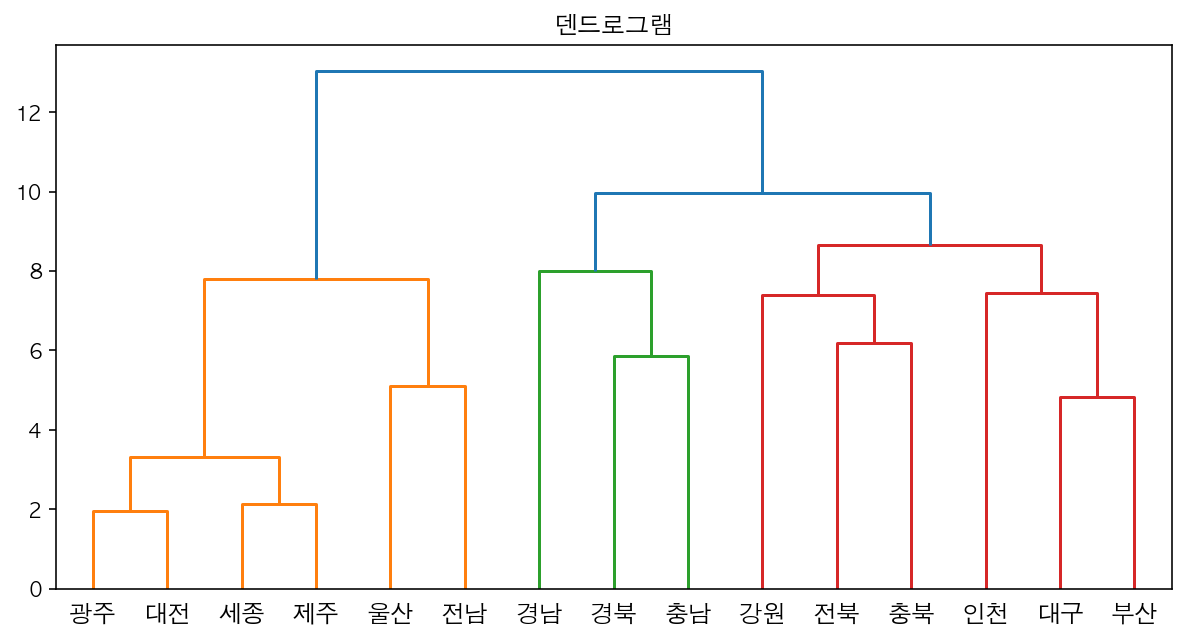

In [32]:
Z = linkage(df_sc, metric='euclidean', method='ward') 
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=df.index.tolist())
plt.show

In [33]:
k = KMeans(n_clusters= 8).fit(df_sc)

In [34]:
centers = k.cluster_centers_ ; centers[:2]

array([[ 0.47507237,  0.93772248,  1.12104758,  0.98432519,  1.2790136 ,
         1.85861879,  0.68909021,  1.58320209,  0.06523783,  0.4158599 ,
         1.13785365,  0.45910913,  0.34147599,  0.3655753 ,  2.22644616,
         0.5894539 ,  0.49134744,  0.15503658,  0.81377495,  2.11892669,
         1.6060087 , -0.39167828, -0.26144221,  0.70392275],
       [-1.05197991, -1.11013559, -1.25649503, -0.55151969, -0.77622442,
        -1.06099427, -0.99314457, -0.51810481, -0.54749103, -0.50241786,
        -0.69401233, -0.68377274, -0.46963477, -0.61813549, -0.84005063,
        -0.9036343 , -0.74723459, -0.38491771, -0.67939734, -0.42225938,
        -0.87754448, -0.53345167, -0.55559073, -0.8156635 ]])

In [35]:
k.labels_

array([6, 4, 0, 1, 2, 1, 2, 1, 5, 7, 5, 3, 1, 0, 3], dtype=int32)

## 산포도 그리기

- PCA 사용

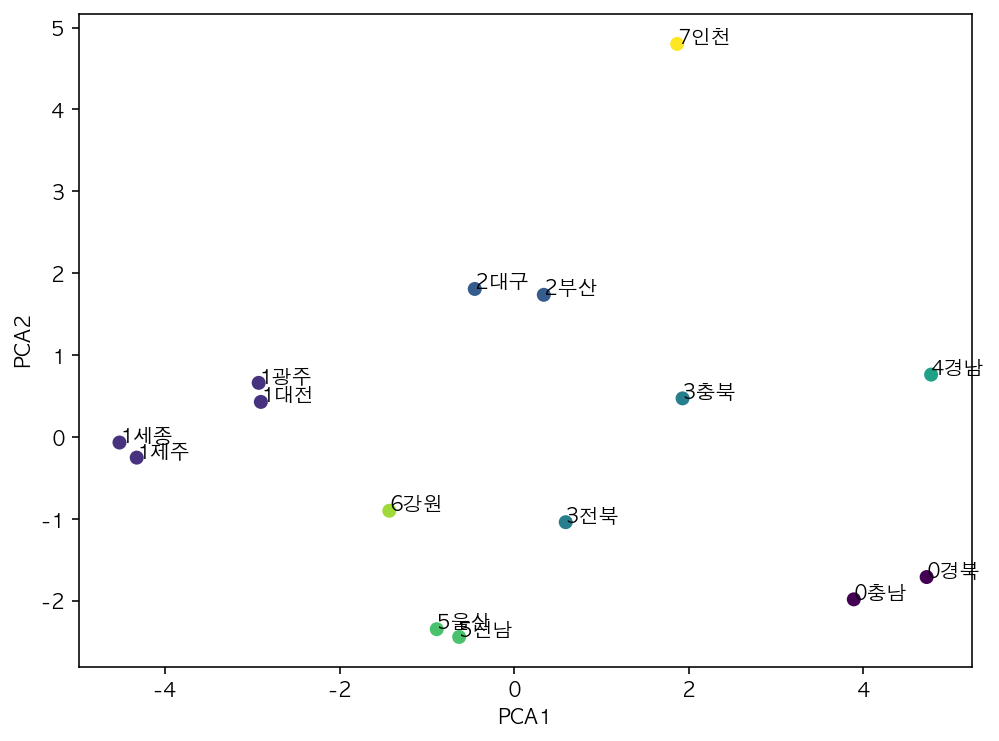

In [36]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(df_sc)
plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0],X_pca2[:,1], c=k.labels_)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
for n in range(df.shape[0]):
    plt.text(X_pca2[:,0][n], X_pca2[:,1][n], str(k.labels_[n])+df.index[n])

# 최적의 k 찾기

- 실루엣 지수 사용

In [37]:
results = []
for c in range(2,len(df_sc)):
  clusterer = KMeans(n_clusters=c)
  cluster_labels = clusterer.fit_predict(df_sc)
  silhouette_avg = silhouette_score(df_sc, cluster_labels)
  results.append([c,silhouette_avg])

df_result = pd.DataFrame(results, columns=["n_clusters","silhouette_score"])
df_result

,n_clusters,silhouette_score
0,2,0.220652
1,3,0.173035
2,4,0.128133
3,5,0.168506
4,6,0.143886
5,7,0.192357
6,8,0.177834
7,9,0.190111
8,10,0.168046
9,11,0.152637


# 밀도기반 클러스터링

- 샘플간 거리가 아니라 일정한 밀도를 유지하는 지를 보고 클러스트를 구성"

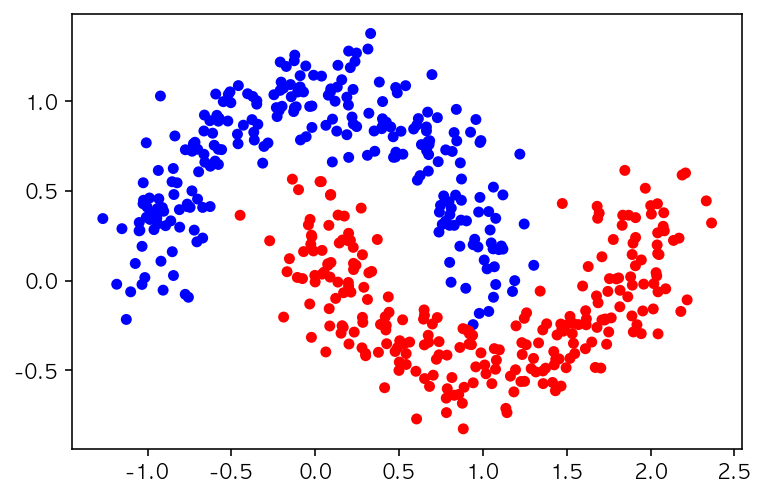

In [38]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=500, noise=0.15, random_state=11)
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='bwr')
plt.show()

## kMeans() 사용

In [52]:
k = KMeans(n_clusters=2) # (1) 모델 생성, 정의, 생성자
k.fit(X) # (2) 학습
k.labels_[:20]

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
      dtype=int32)

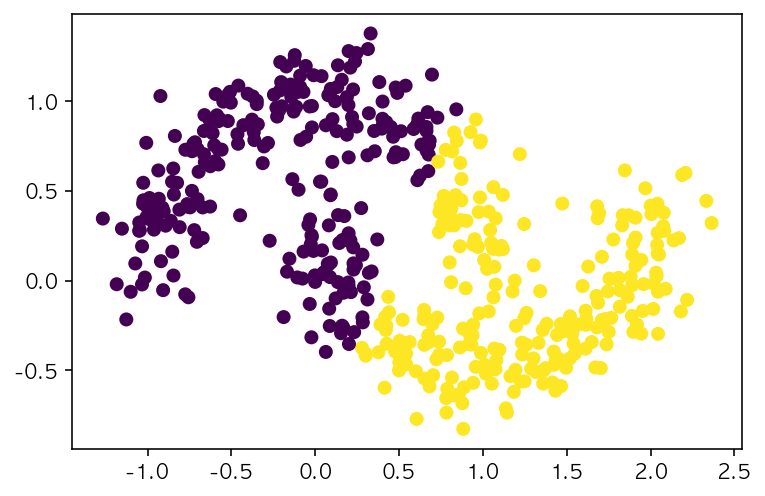

In [53]:
# 클러스터를 표시
plt.scatter(X[:,0], X[:,1],c=k.labels_)

## DBSCAN 사용

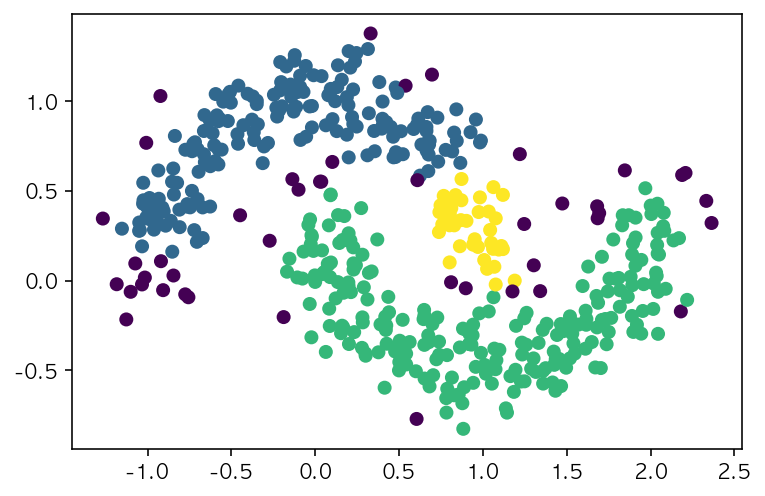

In [54]:
dbscan = DBSCAN(eps=0.15, min_samples=8, metric='euclidean')
dbscan.fit(X)
plt.scatter(X[:,0], X[:,1],c=dbscan.labels_)

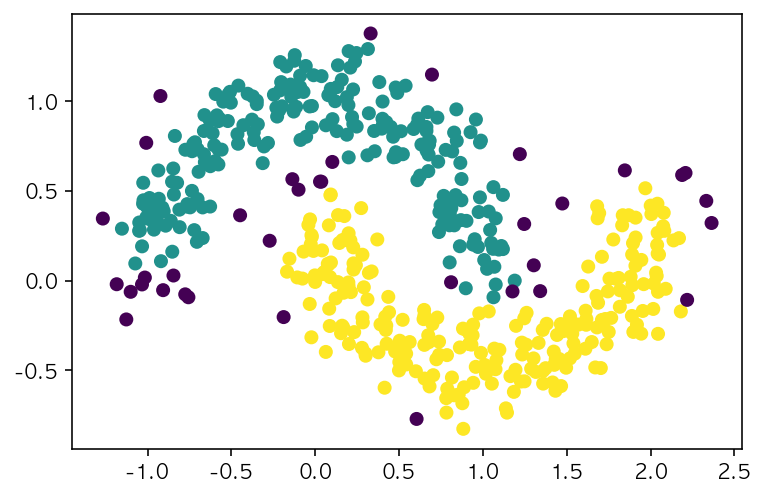

In [55]:
dbscan = DBSCAN(eps=0.17, min_samples=10, metric='euclidean')
dbscan.fit(X)
plt.scatter(X[:,0], X[:,1],c=dbscan.labels_)

# 클러스터링의 predict()
- kMeans 클러스터링 모델은 "예측" 기능을 제공한다
- 특성 공간의 좌표 값을 주면 어느 클러스터에 속하는지 예측해준다

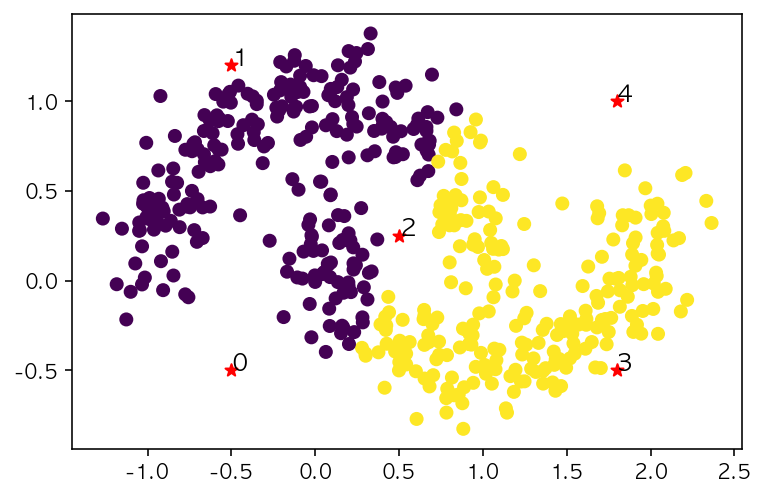

In [56]:
# 임의의 5개 좌표
X_samples = np.array([[-0.5,-0.5],  [-0.5,1.2], [0.5,0.25],  [1.8,-0.5],  [1.8,1]])

plt.scatter(X[:,0], X[:,1],c=k.labels_)
plt.scatter(X_samples[:,0], X_samples[:,1],c='r',s=40, marker='*')
for i in range(len(X_samples)):
    plt.text(X_samples[:,0][i], X_samples[:,1][i], str(i), fontsize=12)

In [57]:
k.predict(X_samples)

array([0, 0, 0, 1, 1], dtype=int32)

- (참고) 학습과 예측을 동시에 수행하는 함수: fit_predict()

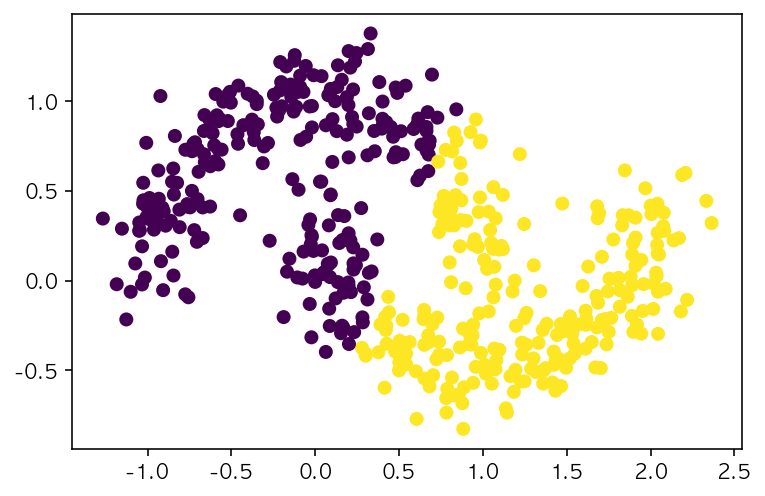

In [58]:
k = KMeans(n_clusters=2)
label_pred = k.fit_predict(X) # (3) 모델 사용 (클러스터 예측)
plt.scatter(X[:,0], X[:,1], c = label_pred)